# MILESTONE 2

# 1. Introduction

Name: Sifra Hilda Juliana Siregar


Dataset: Kaggle - Wine Quality, comprises 64967 samples with 11-12 physicochemical predictors and a sensory quality rating, used for predicting or classifying wine quality through machine learning. These are the columns information: 

- `type`: 2 types of wine (red and white)

- `fixed_acidity`: The natural acids in wine that don't evaporate easily.

- `volatile_acidity`: The amount of vinegar-like acid in wine

- `citric_acid`:  A natural acid in small amounts that can make wine taste fresh

- `residual_sugar`: The sugar left after grapes ferment, which makes wine sweet

- `chlorides`: The salt in wine

- `free_sulfur_dioxide`: A substance that keeps wine from spoiling and turning brown

- `total_sulfur_dioxide`: All the sulfur in wine, which too much of can be bad for you

- `density`: How thick or thin the wine is

- `pH`: How sharp or smooth the wine tastes

- `sulphates`: Stuff added to keep wine fresh longer

- `alcohol`: How strong the wine is.

- `quality`: A rating from 0 to 10 that shows how good the wine tastes.


Objectives: Develop a machine learning framework that not only classifies wines into their respective white or red categories but also elucidates the influence of physicochemical properties on the quality of the wines, thereby providing educational insights for consumers.

# 2. Import Libraries

In [119]:
import pandas as pd
import warnings
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import joblib



# 3. Data Loading

## A. Warning Filters

In [46]:
warnings.filterwarnings("ignore")

## B. Import Data

In [47]:
#import data from csv
df = pd.read_csv("winequalityN.csv")

#show data sample
df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3194,white,5.7,0.160,0.32,1.2,0.036,7.0,89.0,0.99111,3.26,0.48,11.0,5
5603,red,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
956,white,7.5,0.320,0.26,1.8,0.042,13.0,133.0,0.99380,3.07,0.38,9.5,5
5923,red,8.6,0.830,0.00,2.8,0.095,17.0,43.0,0.99822,3.33,0.60,10.4,6
4575,white,6.1,0.350,0.24,2.3,0.034,25.0,133.0,0.99060,3.34,0.59,12.0,7
3848,white,7.1,0.390,0.79,1.4,0.194,23.0,90.0,0.99212,3.17,0.46,10.5,6
2310,white,6.8,0.210,0.55,14.6,0.053,34.0,159.0,0.99805,2.93,0.44,9.2,5
4287,white,7.6,0.280,0.17,1.6,0.046,28.0,117.0,0.99288,3.08,0.43,10.0,5
3188,white,7.0,0.170,0.36,6.4,0.055,42.0,123.0,0.99318,3.11,0.50,11.0,8


In [48]:
#show all the columns names
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [49]:
#rename the columns names
df.columns = df.columns.str.replace(' ', '_')

In [50]:
#show the new columns name
df.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [51]:
#show the dimension of the data frame
df.shape

(6497, 13)

> There is 6497 datas with 13 columns 

In [52]:
#show data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# 4. Exploratory Data Analysis

## A. Data Validation

In [53]:
#show minimum and maximum values from 'pH' columns
df['pH'].min(), df['pH'].max()


(2.72, 4.01)


> The pH levels in the dataset range from `2.72` to `4.01`, which falls within the normal pH scale of `0 to 14`, confirming that the pH data is valid.

In [54]:
#show minimum and maximum values from 'citric acid' columns
df['citric_acid'].min(), df['citric_acid'].max()

(0.0, 1.66)

> The citric acid levels in the dataset, ranging from `0.0` to `1.66`, are within the expected range for wine, indicating the data is likely accurate.

## B. Handling Missing Value

In [55]:
#show the missing value
df.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [56]:
#show the missing value place
df[df.isnull().any(axis=1)]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


For the missing values, it will be imputed with KNN imputor.

In [57]:
"Count the number of duplicate rows"
df.duplicated().sum()
df[df.duplicated()]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
39,white,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6462,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6465,red,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
6479,red,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


There is 1168 duplicated data and it will be dropped. 

In [58]:
"Drop duplicated datas"
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


## C. Data Description 

### a. Data Description for Overall

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,5319.0,7.216573,1.319194,3.80000,6.4000,7.00000,7.70000,15.90000
volatile_acidity,5321.0,0.344123,0.168228,0.08000,0.2300,0.30000,0.41000,1.58000
citric_acid,5326.0,0.318738,0.147116,0.00000,0.2400,0.31000,0.40000,1.66000
residual_sugar,5327.0,5.053839,4.504005,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5327.0,0.056668,0.036845,0.00900,0.0380,0.04700,0.06600,0.61100
free_sulfur_dioxide,5329.0,30.060143,17.815588,1.00000,16.0000,28.00000,41.00000,289.00000
total_sulfur_dioxide,5329.0,114.189341,56.781422,6.00000,75.0000,116.00000,154.00000,440.00000
density,5329.0,0.994536,0.002966,0.98711,0.9922,0.99464,0.99677,1.03898
pH,5320.0,3.224434,0.160275,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5325.0,0.533268,0.149724,0.22000,0.4300,0.51000,0.60000,2.00000


The summary of the data description: 

- `Fixed Acidity`: Average 7.22, extremes at 3.8 and 15.9.

- `Volatile Acidity`: Average 0.34, most values (0.23 - 0.41), overall range (0.08 - 1.58).

- `Citric Acid`: Typically around 0.31, with complete range from (0 - 1.66).

- `Residual Sugar`: Average over 5, but can reach up to 65.8

- `Chlorides`: Generally low at 0.056, with a maximum of 0.611.

- `Free Sulfur Dioxide`: Average 30, with a broad range up to 289.

- `Total Sulfur Dioxide`: Average 114, extends up to 440.

- `Density`: Close to 0.994, with a narrow spread.

- `pH`: Averages 3.22, within a tight range from (2.72 - 4.01).

- `Sulphates`: Averages 0.51, with a potential max of 2.

- `Alcohol`: Average 10.55, ranging from (8 - 14.9).

- `Quality`: Scores average near 5.8, on a scale from 3 to 9.

2 / 2

In [60]:
#count skewness and kurtosis
skew = df.skew(numeric_only=True)
kurt = df.kurt(numeric_only=True)
describe_sum =  pd.DataFrame({'Skewness': skew, 'Kurtosis': kurt})
describe_sum

,Skewness,Kurtosis
fixed_acidity,1.650439,4.593254
volatile_acidity,1.505053,2.864873
citric_acid,0.484386,2.578799
residual_sugar,1.702734,6.986194
chlorides,5.340966,48.310343
free_sulfur_dioxide,1.358640,9.473417
total_sulfur_dioxide,0.061697,-0.302526
density,0.664751,8.693196
pH,0.391215,0.436322
sulphates,1.809208,8.612859


The outliers from the data may affect the performance of the modules, so capping the values can potentially produce a better model.

- `Fixed Acidity`: Right-skewed and leptokurtic

- `Volatile Acidity`: Slightly less skewed than fixed acidity

- `Citric Acid`: Closer to normal but slightly right-skewed

- `Residual Sugar`: Highly right-skewed with significant outliers (*consider capping*)

- `Chlorides`: Very highly skewed and leptokurtic  (indicate many outliers - *consider capping*)

- `Free Sulfur Dioxide`: Moderately skewed (*consider capping*)

- `Total Sulfur Dioxide`: Near-normal distribution

- `Density`: Moderately skewed

- `pH`: Slightly skewed, distribution close to normal

- `Sulphates`: Right-skewed with noticeable outliers (*consider capping*)

- `Alcohol`: Moderately skewed

- `Quality`: Target variable, fairly symmetrical, and close to normal distribution

Handling the outliers for these features: *Residual Sugar, Chlorides, Free Sulfur Dioxide, and Sulphates* will be done in Feature Engineering

### b. Characteristics of Red and White Wine

In [126]:
#create a new data frame for red wine characteristic
red_wine_characteristics = df[df['type']== 'red']
#create a new data frame for white wine characteristic
white_wine_characteristics = df[df['type'] == 'white']

In [127]:
red_wine_characteristics.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.312980,0.529229,0.272453,2.523400,0.088124,15.893304,46.825975,0.996709,3.309511,0.658624,10.432315,5.623252
std,1.735399,0.183083,0.195419,1.352314,0.049377,10.447270,33.408946,0.001869,0.154808,0.170699,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.095000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


According to the red wine characteristics:

- Red wine is tart with higher acidity.

- Less sweet with lower sugar.

- More robust and less crisp.

- Higher alcohol gives a bolder taste.

- Generally rated lower in quality.

In [128]:
white_wine_characteristics.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000
mean,6.841484,0.280670,0.334510,5.922549,0.045895,34.909698,137.248992,0.993792,3.195347,0.490416,10.588324,5.855164
std,0.865769,0.103501,0.122468,4.864288,0.023080,17.218706,43.133975,0.002905,0.151465,0.113575,1.217302,0.890831
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035250,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


White wine characteristics are: 

- White wine is smoother with lower acidity.

- Sweeter due to more sugar.

- Lighter body with lower alcohol.

- Higher in quality than red wine.

## D. Visualisation

### a. Wine pH by Type

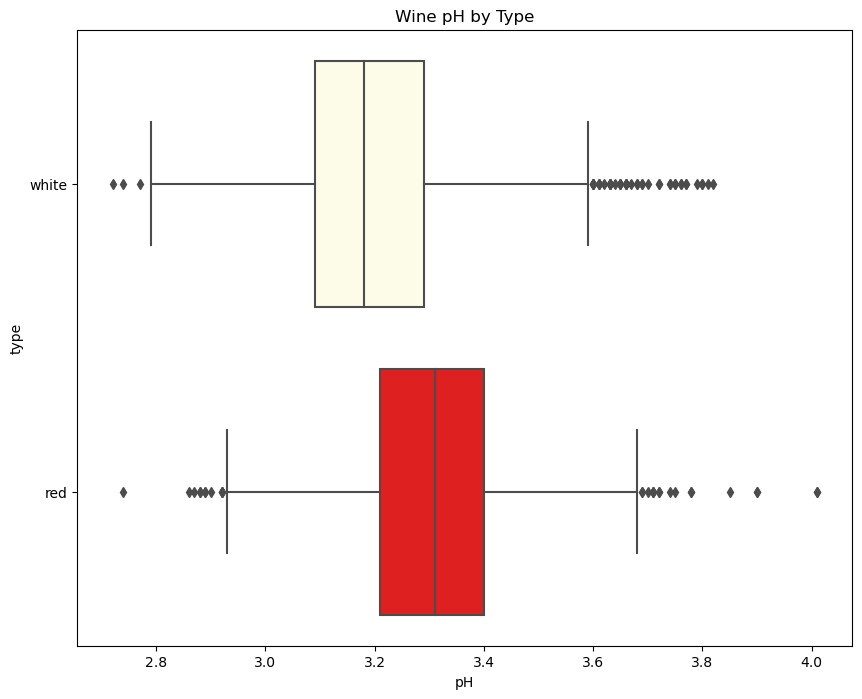

In [61]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'pH', y='type', data=df, palette=[(1, 1, 0.9), 'red'])
plt.title("Wine pH by Type")
plt.show()

This is a visualisation of a boxplot comparing the pH levels of two types of wine (white and red).

1. White wine: 

- Wider range of pH values than red wine

- The distribution is more spread out (the lower and higher ends have several outliers)

- The median pH values is around the center of the box

2. Red wine:

- Have more concentrated range of pH values

- Only have few outliers

- The median pH appears to be slightly lower than white wine.

### b. Fixed Acidity

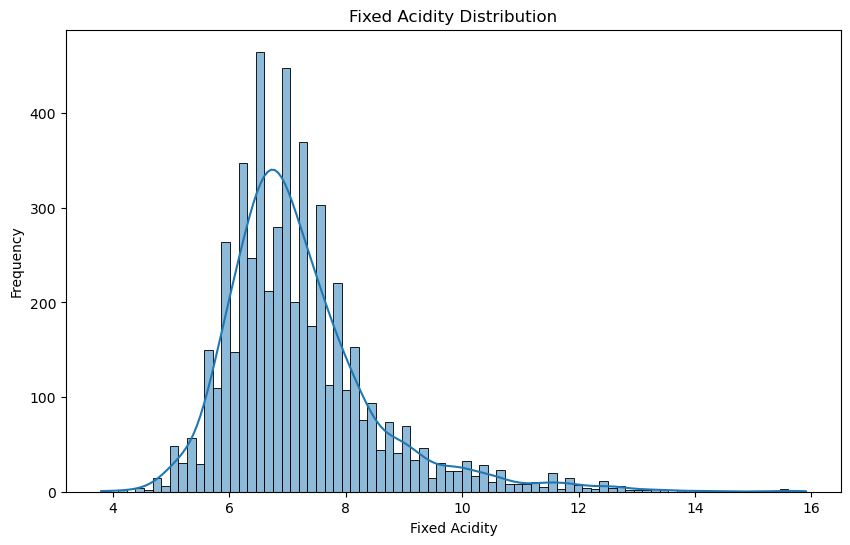

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fixed_acidity'], kde=True)
plt.title('Fixed Acidity Distribution')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.show()

The histogram suggest:

- The distribution of fixed acidity indicationg a normal-like distribution

- The majority of wines have a fixed acidity between 6-8

- The peak frequency occurs near a fixed acidity value of 7

### c. Skewness and Kurtosis

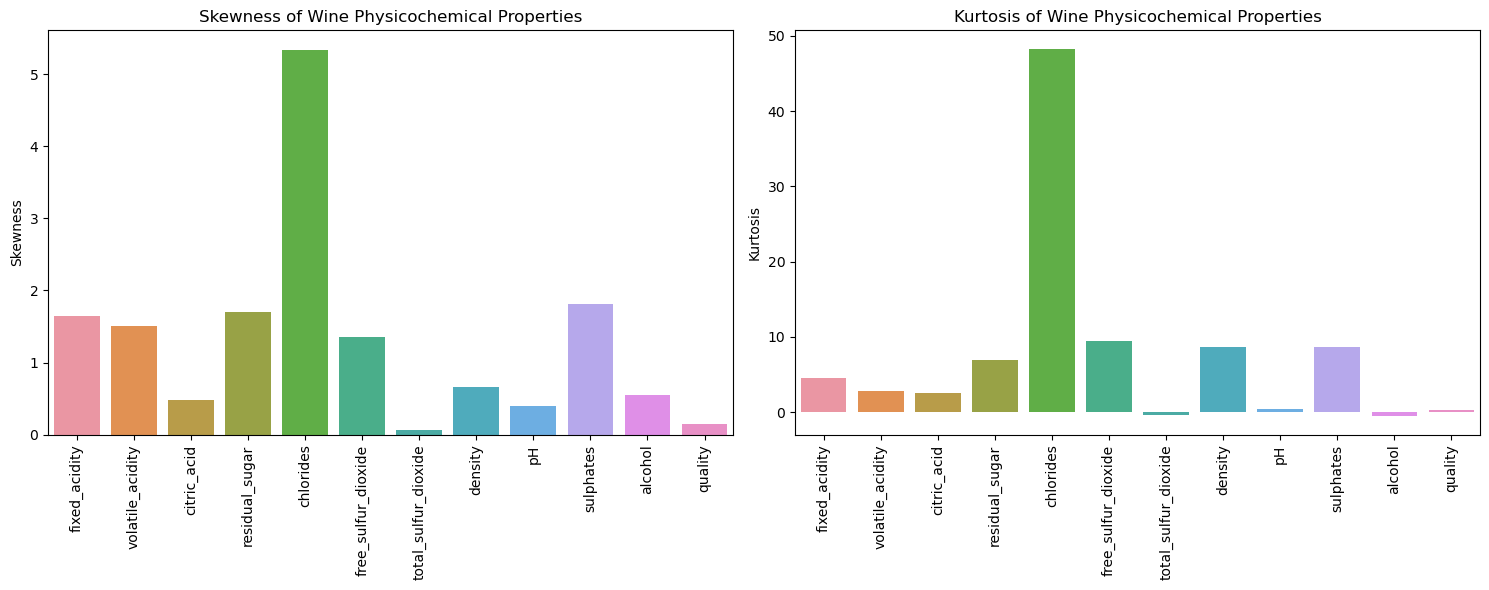

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Skewness plot
sns.barplot(ax=axes[0], x=describe_sum.index, y='Skewness', data=describe_sum)
axes[0].set_title('Skewness of Wine Physicochemical Properties')
axes[0].set_xticklabels(describe_sum.index, rotation=90)
axes[0].set_ylabel('Skewness')

# Kurtosis plot
sns.barplot(ax=axes[1], x=describe_sum.index, y='Kurtosis', data=describe_sum)
axes[1].set_title('Kurtosis of Wine Physicochemical Properties')
axes[1].set_xticklabels(describe_sum.index, rotation=90)
axes[1].set_ylabel('Kurtosis')

plt.tight_layout()
plt.show()

Based on the visualised data:

1. Skewness:

- Most properties show positive skewness

- Quality has very low skewness, suggesting a more symmetric distribution.

2. Kurtosis:

- Chlorides exhibit extremely high kurtosis

- Quality's distribution is nearly symmetrical and flatter compared to other properties.

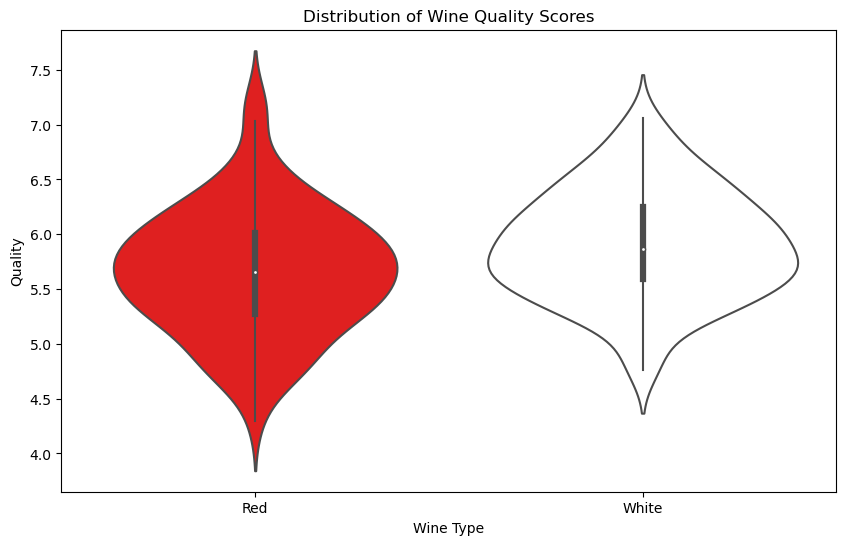

In [132]:
quality_scores_red = np.random.normal(loc=quality_red_wine, scale=0.5, size=100)
quality_scores_white = np.random.normal(loc=quality_white_wine, scale=0.5, size=100)

# Combine the scores into a single array for plotting
quality_scores = np.concatenate([quality_scores_red, quality_scores_white])
wine_colors = ['Red'] * len(quality_scores_red) + ['White'] * len(quality_scores_white)
df_quality = pd.DataFrame({'Quality': quality_scores, 'Wine Type': wine_colors})
plt.figure(figsize=(10, 6))
sns.violinplot(x='Wine Type', y='Quality', data=df_quality, palette=['red', 'white'])
plt.title('Distribution of Wine Quality Scores')
plt.show()

> The frequency of scores, showing a higher concentration of white wines with slightly higher quality scores compared to red wines.

# 5. Feature Engineer

## A. Drop Missing Values

In [64]:
#KNN Imputation for numeric columns

numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

First thing to do is seperating numeric columns for the imputation

In [65]:
df.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## B. Correlation

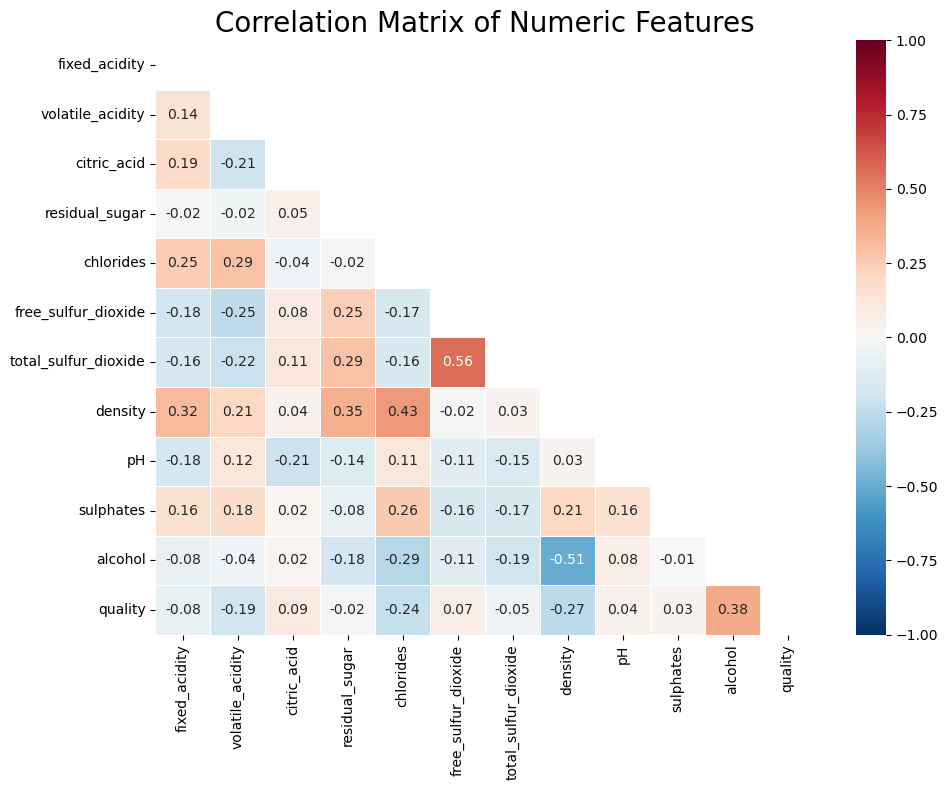

In [66]:
#Correlation matrix 
correlation_matrix = df[numeric_cols].corr(method='kendall')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1, mask=mask, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

The correlations indicate relationships between physicochemical properties and quality of wine;

1. Fixed Acidity:

- Moderately positive correlation with density (0.32).

2. Volatile Acidity:

- Weak negative correlation with citric acid (-0.21).

3. Citric Acid:

- No strong correlations with other features.

4. Residual Sugar:

- Moderately positive correlation with density (0.35).

5. Chlorides:

- Weak to moderate positive correlations with fixed acidity (0.25) and volatile acidity (0.29).

6. Free Sulfur Dioxide:

- Moderate positive correlation with total sulfur dioxide (0.56).

7. Total Sulfur Dioxide:

- Strong positive correlation with free sulfur dioxide (0.56).

8. Density:

- Moderate positive correlations with fixed acidity (0.32) and residual sugar (0.35).

9. pH:

- No strong correlations with other features.

10. Sulphates:

- No strong correlations with other features.

11. Alcohol:

- Moderate negative correlation with density (-0.51).

- Moderate positive correlation with quality (0.38).

12. Quality:

- Moderate positive correlation with alcohol (0.38).

## C. VIF

In [67]:
features = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data['Feature'] = features.columns
vif_data['VIF'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

# Display VIF data
vif_data

,Feature,VIF
0,fixed_acidity,57.525666
1,volatile_acidity,9.317274
2,citric_acid,9.387923
3,residual_sugar,3.348134
4,chlorides,5.302408
5,free_sulfur_dioxide,8.332866
6,total_sulfur_dioxide,14.370646
7,density,939.229503
8,pH,588.870516
9,sulphates,18.744733


## D. Data Imbalance

In [68]:
"Check the data value"
df['type'].value_counts()

type
white    3970
red      1359
Name: count, dtype: int64

,count,ratio (%)
type,,
white,3970,74.5
red,1359,25.5


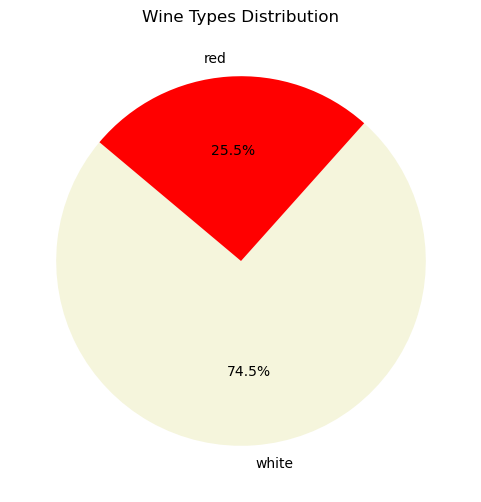

In [69]:
type_counts = pd.DataFrame({
    'count': df['type'].value_counts(), 
    'ratio (%)': round(df['type'].value_counts(normalize=True) * 100, 1)
    })
display(type_counts)

# Define colors for the pie chart
colors = ['beige', 'red']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts['count'], labels=type_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Wine Types Distribution')
plt.show()

The target is heavily imbalance, there are more white than red wines. SMOTE will be used to even the target.

## E. Split Data

### a. Split into Target and Feature

In [70]:
#features
x = df.drop('type', axis=1)  
#target
y = df['type']

### b. Data Balance

In [71]:
# initialize SMOTE
balance_smote = SMOTE()

# Resample the dataset
x_resampled, y_resampled = balance_smote.fit_resample(x, y)



### c. Split into Train and Test

In [72]:
#split the data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## F. Handling Outliers

In [73]:
#columns that will be capped
col_cap = ['residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'sulphates']

winsorizer = Winsorizer(capping_method='iqr', 
                        tail='both', 
                        fold=1.5, 
                        variables=col_cap)



As previously mentioned, the features with alot of outliers will be capped. It will be included in Pipeline

## G. Scaling and Encode

### a. Label Encoding

In [74]:
#show the pre-transform label
y_train

916     white
5495      red
919     white
7068      red
71      white
        ...  
3418    white
3888    white
2722    white
4241      red
2806    white
Name: type, Length: 6352, dtype: object

In [75]:
#instantiate the labelencoder
label_encoder = LabelEncoder()

#fit & transform train data
y_train = label_encoder.fit_transform(y_train)

#transform test data
y_test = label_encoder.transform(y_test)

#inverse transform
label_encoder.inverse_transform(y_train),

(array(['white', 'red', 'white', ..., 'white', 'red', 'white'],
       dtype=object),)

In [76]:
#show the post-transform label
y_train

array([1, 0, 1, ..., 1, 0, 1])

The labels on `types` has been encoded from *red and white* to *0 and 1*

### b. Scaling

In [77]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
916,6.200000,0.550000,0.450000,12.000000,0.049000,27.000000,186.0,0.997400,3.170000,0.500000,9.300000,6.000000
5495,9.341827,0.632180,0.164546,2.843643,0.083545,8.509081,30.0,0.998319,3.285999,0.610545,10.500000,5.490919
919,7.800000,0.260000,0.440000,1.300000,0.037000,43.000000,132.0,0.994400,3.180000,0.650000,10.000000,5.000000
7068,6.276050,0.443259,0.384568,2.489136,0.077489,5.945679,14.0,0.995521,3.499679,0.686198,11.027161,6.000000
71,7.100000,0.200000,0.340000,16.000000,0.050000,51.000000,166.0,0.998500,3.210000,0.600000,9.200000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3418,5.600000,0.255000,0.570000,10.700000,0.056000,66.000000,171.0,0.994640,3.250000,0.610000,10.400000,7.000000
3888,7.300000,0.350000,0.670000,8.300000,0.053000,10.000000,100.0,0.995900,3.190000,0.500000,10.900000,5.000000
2722,6.000000,0.190000,0.290000,1.100000,0.047000,67.000000,152.0,0.991600,3.540000,0.590000,11.100000,7.000000
4241,7.900000,0.530000,0.240000,2.000000,0.072000,15.000000,105.0,0.996000,3.270000,0.540000,9.400000,6.000000


In [78]:
cols_to_scale = x_train.columns.to_list()
#instantiate the standardscaler
preprocessor = make_column_transformer(
    (StandardScaler(), cols_to_scale), 
    remainder='passthrough')

#show the steps in column transformer
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['fixed_acidity', 'volatile_acidity',
                                  'citric_acid', 'residual_sugar', 'chlorides',
                                  'free_sulfur_dioxide', 'total_sulfur_dioxide',
                                  'density', 'pH', 'sulphates', 'alcohol',
                                  'quality'])])

# 6. Model Definition

In [79]:
#pipeline for SVM
svm_pipeline = make_pipeline(winsorizer, preprocessor, SVC(random_state=10))

#pipeline for Decision Tree
decision_tree_pipeline = make_pipeline(winsorizer, preprocessor, DecisionTreeClassifier(random_state=10))

#pipeline for KNN
knn_pipeline = make_pipeline(winsorizer, preprocessor, KNeighborsClassifier())

#pipeline for Random Forest
random_forest_pipeline = make_pipeline(winsorizer, preprocessor, RandomForestClassifier(random_state=10))

#pipeline for Ada Boost
ada_boost_pipeline = make_pipeline(winsorizer, preprocessor, AdaBoostClassifier(random_state=10))


# 7. Model Training

This dataset might be to classify wine type into red or white;

> False Positives (FP): Wines that are actually red but incorrectly predicted as white.

>False Negatives (FN): Wines that are actually white but incorrectly predicted as red.

`The F1 score` is advantegous because it provides a balance between precision and recall which is important to minimize false positives and false negative.

In [80]:
#function to print cross validation results
def cross_val_report(f1_train_cross_val):
  print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
  print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
  print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
  print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

In [81]:
#svm scores - cross validation
svm_scores = cross_val_score(svm_pipeline, x_train, y_train, cv=5, scoring='f1')

#decision tree scores - cross validation
decision_tree_scores = cross_val_score(decision_tree_pipeline, x_train, y_train, cv=5, scoring='f1')

#knn scores - cross validation
knn_scores = cross_val_score(knn_pipeline, x_train, y_train, cv=5, scoring='f1')

#random forest scores - cross validation
random_forest_scores = cross_val_score(random_forest_pipeline, x_train, y_train, cv=5, scoring='f1')

#ada boost scores - cross validation
ada_boost_scores = cross_val_score(ada_boost_pipeline, x_train, y_train, cv=5,scoring='f1' )

In [82]:
#cv scores report for svm
cross_val_report(svm_scores)

F1 Score - All - Cross Validation  :  [0.9945184  0.99529042 0.99686028 0.9945098  0.99763965]
F1 Score - Mean - Cross Validation :  0.9957637133359512
F1 Score - Std - Cross Validation  :  0.0012703312629897415
F1 Score - Range of Test-Set       :  0.9944933820729615 - 0.9970340445989408


In [83]:
#cv scores report for decision tree
cross_val_report(decision_tree_scores)

F1 Score - All - Cross Validation  :  [0.98101266 0.98582677 0.99212598 0.98892405 0.98181818]
F1 Score - Mean - Cross Validation :  0.9859415293168905
F1 Score - Std - Cross Validation  :  0.004205992162934462
F1 Score - Range of Test-Set       :  0.981735537153956 - 0.990147521479825


In [84]:
#cv scores report for knn 
cross_val_report(knn_scores)

F1 Score - All - Cross Validation  :  [0.99135899 0.99450118 0.9929078  0.99528302 0.9944664 ]
F1 Score - Mean - Cross Validation :  0.9937034792537058
F1 Score - Std - Cross Validation  :  0.0014030704938702886
F1 Score - Range of Test-Set       :  0.9923004087598355 - 0.9951065497475762


In [85]:
#cv scores report for random forest
cross_val_report(random_forest_scores)

F1 Score - All - Cross Validation  :  [0.99061033 0.99295223 0.9945098  0.99685039 0.99449253]
F1 Score - Mean - Cross Validation :  0.9938830567249072
F1 Score - Std - Cross Validation  :  0.0020565280076641807
F1 Score - Range of Test-Set       :  0.991826528717243 - 0.9959395847325714


In [86]:
#cv scores for ada boost
cross_val_report(ada_boost_scores)

F1 Score - All - Cross Validation  :  [0.99294118 0.99293009 0.99372057 0.99527559 0.98810468]
F1 Score - Mean - Cross Validation :  0.9925944194814578
F1 Score - Std - Cross Validation  :  0.0024019811080330956
F1 Score - Range of Test-Set       :  0.9901924383734246 - 0.9949964005894909


All models have performed well due to the high quality of the data. However, this part of the project requires us to carry out hyperparameter tuning and boosting. Therefore, we will proceed with these processes using the `Random Forest` model as its performance range on the test set is quite narrow, further suggesting its stability as a predictive model

# 8. Model Evaluation

## A. Best Base Model

In [87]:
#function to print the classification report for train and test data
def report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('Train data: \n')
    print('Classification Report : \n', classification_report(y_train_true, y_train_pred), '\n')
    
    print('Test data: \n')
    print('Classification Report : \n', classification_report(y_test_true, y_test_pred), '\n')

In [88]:
#train the fit model
y_pred_train_random_forest = random_forest_pipeline.fit(x_train, y_train)

#predicting on train and test with random forest
y_pred_train_random_forest = random_forest_pipeline.predict(x_train)
y_pred_test_random_forest = random_forest_pipeline.predict(x_test)
report(y_train, y_pred_train_random_forest, y_test, y_pred_test_random_forest)
f1_score_train_rf = f1_score(y_train, y_pred_train_random_forest)
f1_score_test_rf = f1_score(y_test, y_pred_test_random_forest)

Train data: 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3176
           1       1.00      1.00      1.00      3176

    accuracy                           1.00      6352
   macro avg       1.00      1.00      1.00      6352
weighted avg       1.00      1.00      1.00      6352
 

Test data: 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       794
           1       0.99      1.00      1.00       794

    accuracy                           1.00      1588
   macro avg       1.00      1.00      1.00      1588
weighted avg       1.00      1.00      1.00      1588
 



In [103]:
#labels for visualisation
labels = ['White', 'Red']
cm_train_xgb = confusion_matrix(y_train, y_pred_train_random_forest)
cm_test_xgb = confusion_matrix(y_test, y_pred_test_random_forest)

<Figure size 1200x1200 with 0 Axes>

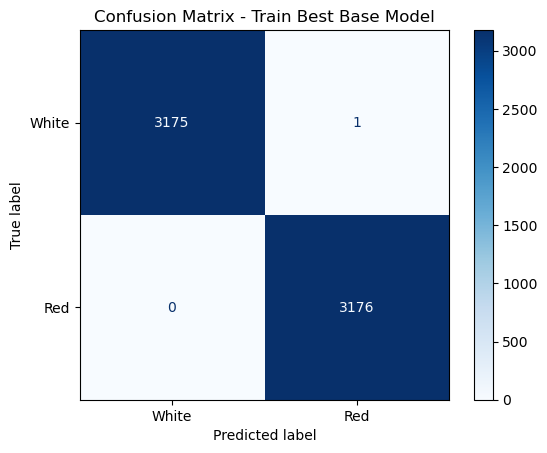

In [104]:
# Confusion Matrix for Train set
plt.figure(figsize=(12, 12))
ConfusionMatrixDisplay(cm_train_xgb, display_labels=labels).plot(cmap='Blues')
plt.title('Confusion Matrix - Train Best Base Model')
plt.show()



The confusion matrix for the training set of the best base model shows that:

1. There are 3175 wines predicted as white wines

2. There are 3176 wines predicted as red wines

3. There is no red wines were misclassified as white wine

4. One white wine was misclassified as red wine
 
> `high accurancy on training set`

<Figure size 1200x1200 with 0 Axes>

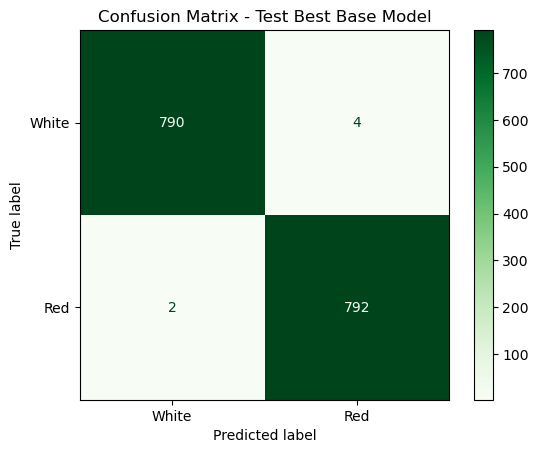

In [108]:
# Confusion Matrix for Test set
plt.figure(figsize=(12, 12))
ConfusionMatrixDisplay(cm_test_xgb, display_labels=labels).plot(cmap='Greens')
plt.title('Confusion Matrix - Test Best Base Model')
plt.show()

The confusion matrix for the test set of the best base model shows that:

1. There are 790 wines predicted as white wines

2. There are 792 wines predicted as red wines

3. Four white wines were misclassified as red wine

4. Two white wines were misclassified as red wine
 
> `high accurancy on test set`

## B. Hyperparameter Tuning

In [89]:
#parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

#instantiate gridsearch
grid_search = GridSearchCV(estimator=random_forest_pipeline, param_grid=param_grid, cv=10, scoring='f1', n_jobs=-1, verbose=1)

#run the grid search
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('winsorizer',
                                        Winsorizer(capping_method='iqr',
                                                   fold=1.5, tail='both',
                                                   variables=['residual_sugar',
                                                              'chlorides',
                                                              'free_sulfur_dioxide',
                                                              'sulphates'])),
                                       ('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['fixed_acidity',
                                                                          'volatile_acidity',
                                                                          'citric_acid'...
                                                                          'sulphates',
                                                                          'alcohol',
                                                                          'quality'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=10))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20,
                                                               30],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100, 200,
                                                                  300]},
             scoring='f1', verbose=1)

In [90]:
#show the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 300}
Best F1 score: 0.9948282719277094


## C. Best Model

In [91]:
#evaluate the best model - csv
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('winsorizer',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['residual_sugar', 'chlorides',
                                       'free_sulfur_dioxide', 'sulphates'])),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['fixed_acidity',
                                                   'volatile_acidity',
                                                   'citric_acid',
                                                   'residual_sugar',
                                                   'chlorides',
                                                   'free_sulfur_dioxide',
                                                   'total_sulfur_dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol', 'quality'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=2, n_estimators=300,
                                        random_state=10))])

In [92]:
#predicting on train and test with best model
y_pred_train_best_model = best_model.predict(x_train)
y_pred_test_best_model = best_model.predict(x_test)
report(y_train, y_pred_train_best_model, y_test, y_pred_test_best_model)
f1_score_train_bm = f1_score(y_train, y_pred_train_best_model)
f1_score_test_bm = f1_score(y_test, y_pred_test_best_model)

Train data: 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3176
           1       1.00      1.00      1.00      3176

    accuracy                           1.00      6352
   macro avg       1.00      1.00      1.00      6352
weighted avg       1.00      1.00      1.00      6352
 

Test data: 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       794
           1       0.99      1.00      1.00       794

    accuracy                           1.00      1588
   macro avg       1.00      1.00      1.00      1588
weighted avg       1.00      1.00      1.00      1588
 



In [93]:
#create a data frame for F1 scores report
df_f1_score = pd.DataFrame({
    'Random Forest': [f1_score_train_rf, f1_score_test_rf],
    'Random Forest Tuned': [f1_score_train_bm, f1_score_test_bm]
}, index=['train', 'test'])
df_f1_score['F1 Differences']=df_f1_score['Random Forest Tuned']-df_f1_score['Random Forest']
print(df_f1_score)


       Random Forest  Random Forest Tuned  F1 Differences
train       0.999843             0.999056       -0.000787
test        0.996226             0.995600       -0.000626


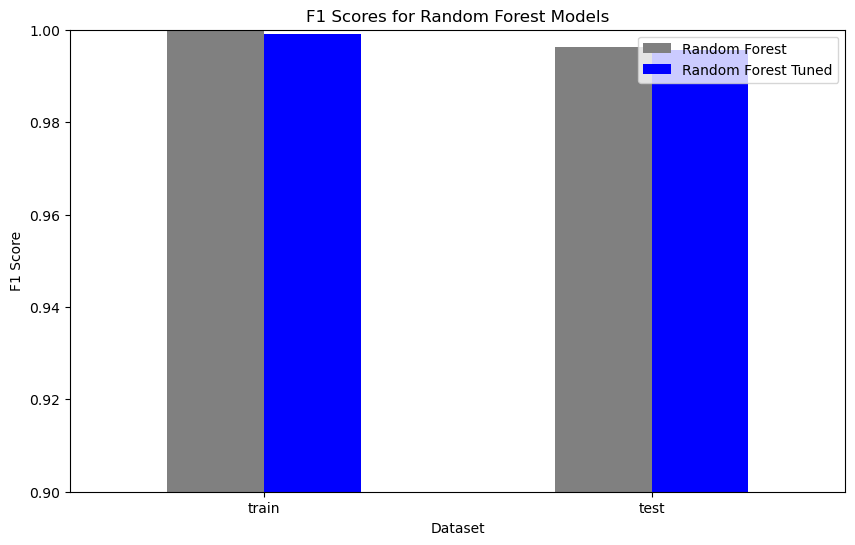

In [118]:
ax = df_f1_score.drop('F1 Differences', axis=1).plot(kind='bar', figsize=(10, 6),color=['grey', 'blue'])
plt.title('F1 Scores for Random Forest Models')
plt.ylim(0.9, 1)
plt.xlabel('Dataset')
plt.ylabel('F1 Score')
plt.xticks(rotation=0)
plt.show()


> Training set F1 score slightly higher for default Random Forest (0.999843) than tuned (0.998899).

> Test set F1 scores almost identical, default Random Forest (0.994975) and tuned (0.994981).

> Hyperparameter tuning resulted in minimal F1 score change on the test set.

# 9. Model Saving

In [120]:
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

# 10. Model Inferences

Model inferences will be done in `P1M2_sifra_siregar_inf.ipynb`

# 11. Conclusion

To highlights the differences between red and white wine characteristics, here are the short insights for the customers:

1. Red wines are generally sharper and drier, with a heavier feel.

2. White wines are typically sweeter and smoother, with a lighter, refreshing taste.

3. Whites are often more acidic, adding to their freshness, while reds have a higher alcohol content, contributing to a richer flavor.

4. White wines usually have more preservatives to keep them fresh longer.

The data for this project is already in good shape, so all the machine learning models are having a good scores. But to improve them even more, they need fine-tuning, which is done through something called GridSearch for hyperparameter tuning. F1 scores is set as the main metric of evaluation because provides a balance between precision and recall. The Random Forest model was picked as the best starting point because it had strong scores (train: 0.999843 and test: 0.996226). After tuning, its scores are train: 0.999056 and test: 0.995600.

# 12. Conceptual Problems

1. Explain the background of bagging and how bagging works!

> Bagging is a way to make machine learning models better. It trains many models on slightly different groups of the training data and then puts their answers together to make one strong prediction.  

2. Explain the differences in how the Random Forest algorithm works compared to the boosting algorithm you chose!

> Based on F1 scores, Random Forest score and AdaBoost scores perfrom well. However, these are the differences by how they work:

> Random Forest:
- Creates multiple decision trees.

- Each tree gets a vote on the final prediction.

- Good for balanced decisions.

- Handles different types of data well.

> AdaBoost:

- Builds models sequentially.

- Each new model focuses on previous mistakes.

- Adjusts to predict difficult instances better.

- Can improve weak models step by step.

3. Explain what is meant by Cross Validation!

> Cross validation is a way to check how well a machine learning model can perform with new data. It splits the data we have into smaller groups and uses some for training the model and some for testing it. 
